In [1]:
import os
os.chdir("..")


    N  batch_size  d_model   dropout  kernel_size  learning_rate  \
0   2         128       36  0.457399           11       0.000123   
1   3         128       29  0.047711            9       0.000104   
2   6         128       24  0.072547            7       0.000071   
3   2         128        4  0.179856            5       0.000037   
4   5         128       34  0.180960            5       0.000195   
5   6         128       11  0.199639            7       0.000050   
6   6         128       39  0.215178           11       0.000250   
7   6         128       25  0.243301            9       0.000048   
8   1         128       45  0.405986            9       0.000063   
9   6         128       17  0.120605            7       0.000097   
10  4         128       54  0.323227           13       0.000153   
11  2         128       64  0.467784           13       0.000115   
12  3         128       47  0.004392           11       0.000138   
13  3         128       52  0.003788           1

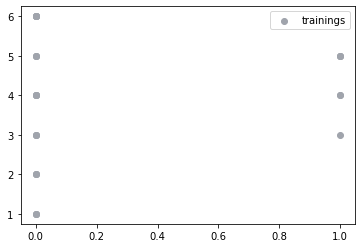

In [2]:
import pandas as pd
import optuna
import matplotlib.pyplot as plt
from src.visualization.utils import FAU_BLUE, FAU_GREY
from src.models.utils import load_model



path = "sqlite:///models/experiment_2_frequency/cnn/optuna_study/experiment_2_frequency.db"
study_name = "experiment_2_frequency"
study = optuna.load_study(study_name, path)

runs =[]
for trial in study.trials:
    params = trial.params
    failed = trial.values is None
    vals = params
    params["failed"] = max(trial.intermediate_values.values()) > 4
    runs.append(vals)

runs = pd.DataFrame(runs)
print(runs)


failed_runs = runs[runs["failed"] == True]
good_runs = runs[runs["failed"] == False]

plot_char = "N"

plt.scatter(runs["failed"], runs[plot_char], color=FAU_GREY, marker='o', label="trainings")
plt.legend()

# Plot Numbe of Params vs fail/not fai

In [3]:
checkpoints_basedir = "models/experiment_2_frequency/cnn/experiments/experiment_2_frequency/data/"
checkpoints = os.listdir(checkpoints_basedir)

# hack because i didn't save number of parameters
models = []
for model_cp in checkpoints:
    creation_time = os.lstat(checkpoints_basedir + model_cp).st_ctime
    model = load_model(checkpoints_basedir + model_cp)
    num_params = sum(p.numel() for p in model.parameters())

    models.append([creation_time, num_params])

2021-09-27 16:36:36 Mischa-PC src.models[4144] INFO Initializing Lightning model without test dataset
2021-09-27 16:36:36 Mischa-PC src.data[4144] INFO Loading dataset from ./experiments/experiment_2_frequency\data\train.pkl
2021-09-27 16:36:36 Mischa-PC src.data[4144] INFO Loading dataset from ./experiments/experiment_2_frequency\data\val.pkl
2021-09-27 16:36:36 Mischa-PC src.data[4144] INFO Shuffling dataset
2021-09-27 16:36:36 Mischa-PC src.data[4144] INFO Data augementation necessary for shuffling with batch size 128 and 9960 number of samples for each sequence length
2021-09-27 16:36:37 Mischa-PC src.data[4144] INFO Initializing and fitting new scaler to dataset
2021-09-27 16:36:37 Mischa-PC src.data[4144] INFO Using provided scaler to normalize dataset
2021-09-27 16:36:37 Mischa-PC src.models[4144] INFO dilations: [1, 2, 4, 8, 16, 32, 64, 128]
2021-09-27 16:36:37 Mischa-PC src.models[4144] INFO Provided path successfully loaded Model of type: <class 'src.models.lightning_models.S

In [9]:
import numpy as np
param_count = np.array(sorted(models, key=lambda x: x[0]))[:, 1]
runs["param_count"] = param_count
failed_runs = runs[runs["failed"] == True]
good_runs = runs[runs["failed"] == False]

print(f"Failed runs {len(failed_runs)} vs. Good runs {len(good_runs)}")

Failed runs 6 vs. Good runs 21


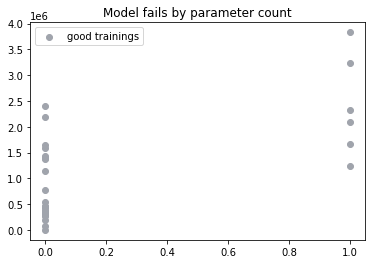

In [8]:
fig = plt.figure()
plt.scatter(runs["failed"], runs["param_count"], color=FAU_GREY, marker='o', label="good trainings")
plt.title("Model fails by parameter count")
plt.legend()

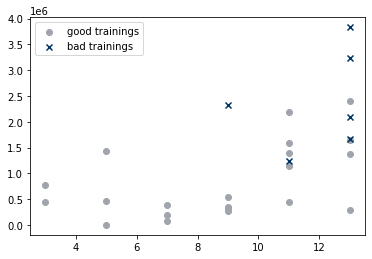

In [7]:
fig = plt.figure()
plt.scatter(good_runs["kernel_size"], good_runs["param_count"], color=FAU_GREY, marker='o', label="good trainings")
plt.scatter(failed_runs["kernel_size"], failed_runs["param_count"], color=FAU_BLUE, marker='x', label="bad trainings")
plt.title("Model fails kernel size vs parameter count")
plt.legend()

<Figure size 432x288 with 0 Axes>

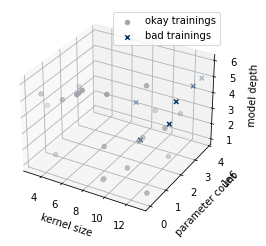

In [6]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(good_runs["kernel_size"], good_runs["param_count"], list(good_runs["N"]), color=FAU_GREY, marker='o', label="okay trainings")
ax.scatter(failed_runs["kernel_size"], failed_runs["param_count"], failed_runs["N"], color=FAU_BLUE, marker='x', label="bad trainings")
ax.set_xlabel('kernel size')
ax.set_ylabel('parameter count')
ax.set_zlabel('model depth')
ax.legend()
plt.show()
